# data for 1y swaps

In [217]:
data=pd.read_excel("1 yr Swap-Swaption Implied Vols.xlsx")
data.set_index('Date', inplace=True)
data=data.reindex(index=data.index[::-1])
data=data.fillna(method="ffill")

data

,1m Implied Vol,3m Implied Vol,1 yr Swap rate
Date,,,
2018-04-23,0.144928,0.169911,2.0960
2018-04-24,0.140990,0.164891,2.0938
2018-04-25,0.141131,0.166400,2.1031
2018-04-26,0.130362,0.159992,2.1070
2018-04-27,0.124474,0.150861,2.1054
...,...,...,...
2022-12-23,0.203641,0.229629,4.8410
2022-12-27,0.211042,0.230953,4.8901
2022-12-28,0.208031,0.232956,4.8695


## using moving average 1yr

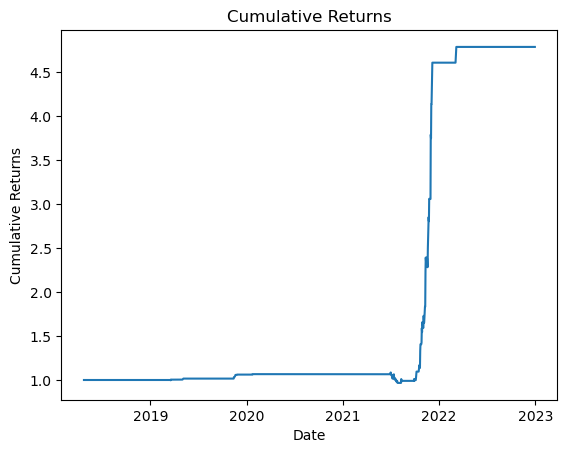

Final Cumulative Return: 4.7902168843484665


In [218]:
#1m 1y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web

# extract 5-year par swap rates from FRED

#par_swap_rates = web.DataReader(['DGS30'], 'fred', start_date, end_date)
par_swap_rates=data["1 yr Swap rate"]

# drop rows with missing data

# compute daily log returns of par swap rates
log_returns = np.log(par_swap_rates) - np.log(par_swap_rates.shift(1))

# compute annualized volatilities of log returns
#volatilities = log_returns.rolling(window=252).std() * np.sqrt(252)
volatilities = data["1m Implied Vol"]


# compute 50-day and 200-day moving averages
ma_50 = par_swap_rates.rolling(window=50).mean()
ma_200 = par_swap_rates.rolling(window=200).mean()

# compute 50-day and 200-day moving average volatilities
ma_vol_50 = volatilities.rolling(window=50).mean()
ma_vol_200 = volatilities.rolling(window=200).mean()

# fill NaN values in volatilities with 0

# define trading signals based on volatilities, moving averages, and stop loss
signals = np.where((par_swap_rates > ma_50) &
                   (ma_50 > ma_200) &
                   (volatilities > ma_vol_50) &
                   (volatilities > ma_vol_200) &
                   (par_swap_rates.shift(1) > ma_50.shift(1)) &
                   (par_swap_rates.shift(1) > ma_200.shift(1)) &
                   (volatilities.shift(1) > ma_vol_50.shift(1)) &
                   (volatilities.shift(1) > ma_vol_200.shift(1)) &
                   (par_swap_rates - par_swap_rates.shift(1) > -0.01), 1,
                   np.where((par_swap_rates < ma_50) &
                            (ma_50 < ma_200) &
                            (volatilities < ma_vol_50) &
                            (volatilities < ma_vol_200) &
                            (par_swap_rates.shift(1) < ma_50.shift(1)) &
                            (par_swap_rates.shift(1) < ma_200.shift(1)) &
                            (volatilities.shift(1) < ma_vol_50.shift(1)) &
                            (volatilities.shift(1) < ma_vol_200.shift(1)) &
                            (par_swap_rates - par_swap_rates.shift(1) < 0.01), -1, 0))

# compute daily returns of trading strategy
daily_returns_1m_1y = signals * log_returns

# fill NaN values in daily returns with 0

# compute cumulative returns of trading strategy
cum_returns_1m_1y = np.exp(daily_returns_1m_1y.cumsum())

# plot cumulative returns of trading strategy
plt.plot(cum_returns_1m_1y)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# print final cumulative return
print('Final Cumulative Return:', cum_returns_1m_1y.iloc[-1])


In [219]:
daily_returns_3m_1y.to_excel("test.xlsx")

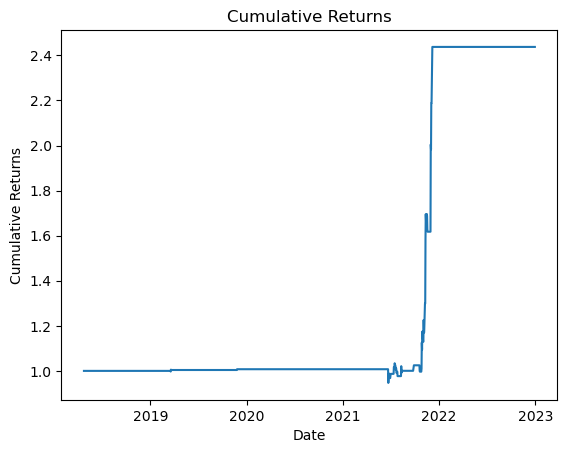

Final Cumulative Return: 2.4375899623032558


In [220]:
#3m1y

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web

# extract 5-year par swap rates from FRED

#par_swap_rates = web.DataReader(['DGS30'], 'fred', start_date, end_date)
par_swap_rates=data["1 yr Swap rate"]

# drop rows with missing data

# compute daily log returns of par swap rates
log_returns = np.log(par_swap_rates) - np.log(par_swap_rates.shift(1))

# compute annualized volatilities of log returns
#volatilities = log_returns.rolling(window=252).std() * np.sqrt(252)
volatilities = data["3m Implied Vol"]


# compute 50-day and 200-day moving averages
ma_50 = par_swap_rates.rolling(window=50).mean()
ma_200 = par_swap_rates.rolling(window=200).mean()

# compute 50-day and 200-day moving average volatilities
ma_vol_50 = volatilities.rolling(window=50).mean()
ma_vol_200 = volatilities.rolling(window=200).mean()

# fill NaN values in volatilities with 0

# define trading signals based on volatilities, moving averages, and stop loss
signals = np.where((par_swap_rates > ma_50) &
                   (ma_50 > ma_200) &
                   (volatilities > ma_vol_50) &
                   (volatilities > ma_vol_200) &
                   (par_swap_rates.shift(1) > ma_50.shift(1)) &
                   (par_swap_rates.shift(1) > ma_200.shift(1)) &
                   (volatilities.shift(1) > ma_vol_50.shift(1)) &
                   (volatilities.shift(1) > ma_vol_200.shift(1)) &
                   (par_swap_rates - par_swap_rates.shift(1) > -0.01), 1,
                   np.where((par_swap_rates < ma_50) &
                            (ma_50 < ma_200) &
                            (volatilities < ma_vol_50) &
                            (volatilities < ma_vol_200) &
                            (par_swap_rates.shift(1) < ma_50.shift(1)) &
                            (par_swap_rates.shift(1) < ma_200.shift(1)) &
                            (volatilities.shift(1) < ma_vol_50.shift(1)) &
                            (volatilities.shift(1) < ma_vol_200.shift(1)) &
                            (par_swap_rates - par_swap_rates.shift(1) < 0.01), -1, 0))

# compute daily returns of trading strategy
daily_returns_3m_1y = signals * log_returns

# fill NaN values in daily returns with 0

# compute cumulative returns of trading strategy
cum_returns_3m_1y = np.exp(daily_returns_3m_1y.cumsum())

#plot cumulative returns of trading strategy
plt.plot(cum_returns_3m_1y)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# print final cumulative return
print('Final Cumulative Return:', cum_returns_3m_1y.iloc[-1])


In [221]:
daily_returns_3m_1y.to_excel("test.xlsx")

# 2yr swap

In [222]:
data=pd.read_excel("2 year Implied Vols.xlsx")
data.set_index('Date', inplace=True)

data=data.ffill(axis = 1)
data=data.reindex(index=data.index[::-1])

#data["2yr Swap"]
#data["1m Implied Vol"]
data=data.dropna()
data

,1m Implied Vol,3m Implied Vol,2 Year Swap Rates
Date,,,
2018-04-24,0.340398,0.381207,2.3366
2018-04-25,0.334828,0.385543,2.3411
2018-04-26,0.313995,0.370068,2.3383
2018-04-27,0.294942,0.364437,2.3380
2018-04-30,0.294993,0.343473,2.3440
...,...,...,...
2022-12-23,0.510203,0.591321,4.3561
2022-12-27,0.556761,0.598744,4.4103
2022-12-28,0.534786,0.601169,4.4145


## Using the moving average 2yr

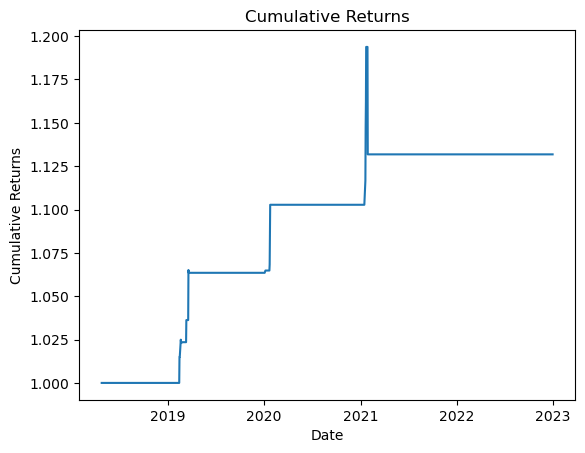

Final Cumulative Return: 1.13179464904834


In [223]:
#1m2y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web

# extract 5-year par swap rates from FRED

#par_swap_rates = web.DataReader(['DGS30'], 'fred', start_date, end_date)
par_swap_rates=data["2 Year Swap Rates"]

# drop rows with missing data

# compute daily log returns of par swap rates
log_returns = np.log(par_swap_rates) - np.log(par_swap_rates.shift(1))

# compute annualized volatilities of log returns
#volatilities = log_returns.rolling(window=252).std() * np.sqrt(252)
volatilities = data["1m Implied Vol"]

# compute 50-day and 200-day moving averages
ma_50 = par_swap_rates.rolling(window=50).mean()
ma_200 = par_swap_rates.rolling(window=200).mean()

# compute 50-day and 200-day moving average volatilities
ma_vol_50 = volatilities.rolling(window=50).mean()
ma_vol_200 = volatilities.rolling(window=200).mean()

# fill NaN values in volatilities with 0

# define trading signals based on volatilities, moving averages, and stop loss
signals = np.where((par_swap_rates > ma_50) &
                   (ma_50 > ma_200) &
                   (volatilities > ma_vol_50) &
                   (volatilities > ma_vol_200) &
                   (par_swap_rates.shift(1) > ma_50.shift(1)) &
                   (par_swap_rates.shift(1) > ma_200.shift(1)) &
                   (volatilities.shift(1) > ma_vol_50.shift(1)) &
                   (volatilities.shift(1) > ma_vol_200.shift(1)) &
                   (par_swap_rates - par_swap_rates.shift(1) > -0.01), 1,
                   np.where((par_swap_rates < ma_50) &
                            (ma_50 < ma_200) &
                            (volatilities < ma_vol_50) &
                            (volatilities < ma_vol_200) &
                            (par_swap_rates.shift(1) < ma_50.shift(1)) &
                            (par_swap_rates.shift(1) < ma_200.shift(1)) &
                            (volatilities.shift(1) < ma_vol_50.shift(1)) &
                            (volatilities.shift(1) < ma_vol_200.shift(1)) &
                            (par_swap_rates - par_swap_rates.shift(1) < 0.01), -1, 0))

# compute daily returns of trading strategy
daily_returns_1m_2y = signals * log_returns

# fill NaN values in daily returns with 0

# compute cumulative returns of trading strategy
cum_returns_1m_2y = np.exp(daily_returns_1m_2y.cumsum())

# plot cumulative returns of trading strategy
plt.plot(cum_returns_1m_2y)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# print final cumulative return
print('Final Cumulative Return:', cum_returns_1m_2y.iloc[-1])

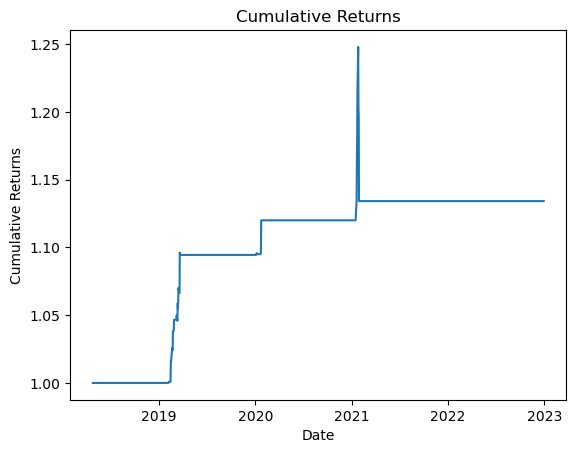

Final Cumulative Return: 1.1341310654309862


In [224]:
#3m2y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web

# extract 5-year par swap rates from FRED
start_date = datetime(2018, 4, 23)
end_date = datetime(2022, 12, 30)
#par_swap_rates = web.DataReader(['DGS30'], 'fred', start_date, end_date)
par_swap_rates=data["2 Year Swap Rates"]

# drop rows with missing data
par_swap_rates.dropna(inplace=True)

# compute daily log returns of par swap rates
log_returns = np.log(par_swap_rates) - np.log(par_swap_rates.shift(1))

# compute annualized volatilities of log returns
#volatilities = log_returns.rolling(window=252).std() * np.sqrt(252)
volatilities = data["3m Implied Vol"]


# compute 50-day and 200-day moving averages
ma_50 = par_swap_rates.rolling(window=50).mean()
ma_200 = par_swap_rates.rolling(window=200).mean()

# compute 50-day and 200-day moving average volatilities
ma_vol_50 = volatilities.rolling(window=50).mean()
ma_vol_200 = volatilities.rolling(window=200).mean()

# fill NaN values in volatilities with 0
volatilities.fillna(0, inplace=True)

# define trading signals based on volatilities, moving averages, and stop loss
signals = np.where((par_swap_rates > ma_50) &
                   (ma_50 > ma_200) &
                   (volatilities > ma_vol_50) &
                   (volatilities > ma_vol_200) &
                   (par_swap_rates.shift(1) > ma_50.shift(1)) &
                   (par_swap_rates.shift(1) > ma_200.shift(1)) &
                   (volatilities.shift(1) > ma_vol_50.shift(1)) &
                   (volatilities.shift(1) > ma_vol_200.shift(1)) &
                   (par_swap_rates - par_swap_rates.shift(1) > -0.01), 1,
                   np.where((par_swap_rates < ma_50) &
                            (ma_50 < ma_200) &
                            (volatilities < ma_vol_50) &
                            (volatilities < ma_vol_200) &
                            (par_swap_rates.shift(1) < ma_50.shift(1)) &
                            (par_swap_rates.shift(1) < ma_200.shift(1)) &
                            (volatilities.shift(1) < ma_vol_50.shift(1)) &
                            (volatilities.shift(1) < ma_vol_200.shift(1)) &
                            (par_swap_rates - par_swap_rates.shift(1) < 0.01), -1, 0))

# compute daily returns of trading strategy
daily_returns_3m_2y = signals * log_returns

# fill NaN values in daily returns with 0
daily_returns_3m_2y.fillna(0, inplace=True)

# compute cumulative returns of trading strategy
cum_returns_3m_2y = np.exp(daily_returns_3m_2y.cumsum())

# plot cumulative returns of trading strategy
plt.plot(cum_returns_3m_2y)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# print final cumulative return
print('Final Cumulative Return:', cum_returns_3m_2y.iloc[-1])


# 5yr swap 

In [239]:
data=pd.read_excel("5 year Implied Vols.xlsx")
print(data)
data.set_index('Date', inplace=True)

data=data.fillna(method='ffill') 
data=data.reindex(index=data.index[::-1])

#data["2yr Swap"]
#data["1m Implied Vol"]


           Date  1m Implied Vol  3m Implied Vol  5 Year Swap Rates
0    2022-12-30        1.571649        1.714200             3.7420
1    2022-12-29        1.589110        1.713599             3.7013
2    2022-12-28        1.578554        1.702463             3.7295
3    2022-12-27        1.659759        1.709536             3.6891
4    2022-12-23        1.529695        1.692305             3.6290
...         ...             ...             ...                ...
1174 2018-04-26        1.020927        1.056979             2.5250
1175 2018-04-25        1.070361        1.102958             2.5390
1176 2018-04-24        1.033601        1.073848             2.5640
1177 2018-04-23        1.040448        1.073650             2.5450
1178        NaT             NaN             NaN             2.5380

[1179 rows x 4 columns]


In [240]:
print(data)


            1m Implied Vol  3m Implied Vol  5 Year Swap Rates
Date                                                         
NaT               1.040448        1.073650             2.5380
2018-04-23        1.040448        1.073650             2.5450
2018-04-24        1.033601        1.073848             2.5640
2018-04-25        1.070361        1.102958             2.5390
2018-04-26        1.020927        1.056979             2.5250
...                    ...             ...                ...
2022-12-23        1.529695        1.692305             3.6290
2022-12-27        1.659759        1.709536             3.6891
2022-12-28        1.578554        1.702463             3.7295
2022-12-29        1.589110        1.713599             3.7013
2022-12-30        1.571649        1.714200             3.7420

[1179 rows x 3 columns]


In [241]:
data.to_excel("test.xlsx")

## Moving average 5yr

In [242]:
#1m5y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web

# extract 5-year par swap rates from FRED
start_date = datetime(2018, 4, 23)
end_date = datetime(2022, 12, 30)
#par_swap_rates = web.DataReader(['DGS30'], 'fred', start_date, end_date)
par_swap_rates=data["5 Year Swap Rates"]

# drop rows with missing data

# compute daily log returns of par swap rates
log_returns = np.log(par_swap_rates) - np.log(par_swap_rates.shift(1))

# compute annualized volatilities of log returns
#volatilities = log_returns.rolling(window=252).std() * np.sqrt(252)
volatilities = data["1m Implied Vol"]

# compute 50-day and 200-day moving averages
ma_50 = par_swap_rates.rolling(window=50).mean()
ma_200 = par_swap_rates.rolling(window=200).mean()

# compute 50-day and 200-day moving average volatilities
ma_vol_50 = volatilities.rolling(window=50).mean()
ma_vol_200 = volatilities.rolling(window=200).mean()

# fill NaN values in volatilities with 0
#volatilities.fillna(method='ffill', inplace=True)

# define trading signals based on volatilities, moving averages, and stop loss
signals = np.where((par_swap_rates > ma_50) &
                   (ma_50 > ma_200) &
                   (volatilities > ma_vol_50) &
                   (volatilities > ma_vol_200) &
                   (par_swap_rates.shift(1) > ma_50.shift(1)) &
                   (par_swap_rates.shift(1) > ma_200.shift(1)) &
                   (volatilities.shift(1) > ma_vol_50.shift(1)) &
                   (volatilities.shift(1) > ma_vol_200.shift(1)) &
                   (par_swap_rates - par_swap_rates.shift(1) > -0.01), 1,
                   np.where((par_swap_rates < ma_50) &
                            (ma_50 < ma_200) &
                            (volatilities < ma_vol_50) &
                            (volatilities < ma_vol_200) &
                            (par_swap_rates.shift(1) < ma_50.shift(1)) &
                            (par_swap_rates.shift(1) < ma_200.shift(1)) &
                            (volatilities.shift(1) < ma_vol_50.shift(1)) &
                            (volatilities.shift(1) < ma_vol_200.shift(1)) &
                            (par_swap_rates - par_swap_rates.shift(1) < 0.01), -1, 0))

# compute daily returns of trading strategy
daily_returns_1m_5y = signals * log_returns

# fill NaN values in daily returns with 0
daily_returns_1m_5y.fillna(method='ffill', inplace=True)

# compute cumulative returns of trading strategy
cum_returns_1m_5y = np.exp(daily_returns_1m_5y.cumsum())

# plot cumulative returns of trading strategy
#plt.plot(cum_returns_1m_5y)
#plt.title('Cumulative Returns')
#plt.xlabel('Date')
#plt.ylabel('Cumulative Returns')
#plt.show()

# print final cumulative return
print('Final Cumulative Return:', cum_returns_1m_5y.iloc[-1])

Final Cumulative Return: 1.1483946488953982


In [243]:
cum_returns_1m_5y

Date
NaT                NaN
2018-04-23    1.000000
2018-04-24    1.000000
2018-04-25    1.000000
2018-04-26    1.000000
                ...   
2022-12-23    1.148395
2022-12-27    1.148395
2022-12-28    1.148395
2022-12-29    1.148395
2022-12-30    1.148395
Name: 5 Year Swap Rates, Length: 1179, dtype: float64

In [244]:
#3m5y
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas_datareader.data as web

# extract 5-year par swap rates from FRED
start_date = datetime(2018, 4, 23)
end_date = datetime(2022, 12, 30)
#par_swap_rates = web.DataReader(['DGS30'], 'fred', start_date, end_date)
par_swap_rates=data["5 Year Swap Rates"]

# drop rows with missing data
#par_swap_rates.dropna(inplace=True)

# compute daily log returns of par swap rates
log_returns = np.log(par_swap_rates) - np.log(par_swap_rates.shift(1))

# compute annualized volatilities of log returns
#volatilities = log_returns.rolling(window=252).std() * np.sqrt(252)
volatilities = data["3m Implied Vol"]

# compute 50-day and 200-day moving averages
ma_50 = par_swap_rates.rolling(window=50).mean()
ma_200 = par_swap_rates.rolling(window=200).mean()

# compute 50-day and 200-day moving average volatilities
ma_vol_50 = volatilities.rolling(window=50).mean()
ma_vol_200 = volatilities.rolling(window=200).mean()

# fill NaN values in volatilities with 0


# define trading signals based on volatilities, moving averages, and stop loss
signals = np.where((par_swap_rates > ma_50) &
                   (ma_50 > ma_200) &
                   (volatilities > ma_vol_50) &
                   (volatilities > ma_vol_200) &
                   (par_swap_rates.shift(1) > ma_50.shift(1)) &
                   (par_swap_rates.shift(1) > ma_200.shift(1)) &
                   (volatilities.shift(1) > ma_vol_50.shift(1)) &
                   (volatilities.shift(1) > ma_vol_200.shift(1)) &
                   (par_swap_rates - par_swap_rates.shift(1) > -0.01), 1,
                   np.where((par_swap_rates < ma_50) &
                            (ma_50 < ma_200) &
                            (volatilities < ma_vol_50) &
                            (volatilities < ma_vol_200) &
                            (par_swap_rates.shift(1) < ma_50.shift(1)) &
                            (par_swap_rates.shift(1) < ma_200.shift(1)) &
                            (volatilities.shift(1) < ma_vol_50.shift(1)) &
                            (volatilities.shift(1) < ma_vol_200.shift(1)) &
                            (par_swap_rates - par_swap_rates.shift(1) < 0.01), -1, 0))

# compute daily returns of trading strategy
daily_returns_3m_5y = signals * log_returns

# fill NaN values in daily returns with 0
#daily_returns_3m_5y.fillna(0, inplace=True)

# compute cumulative returns of trading strategy
cum_returns_3m_5y = np.exp(daily_returns_3m_5y.cumsum())

# plot cumulative returns of trading strategy
#plt.plot(cum_returns_3m_5y)
#plt.title('Cumulative Returns')
#plt.xlabel('Date')
#plt.ylabel('Cumulative Returns')
#plt.show()

# print final cumulative return
print('Final Cumulative Return:', cum_returns_3m_5y.iloc[-1])


Final Cumulative Return: 1.1167697546124298


In [231]:
cum_returns_3m_5y

Date
2022-12-30         NaN
2022-12-29    1.000000
2022-12-28    1.000000
2022-12-27    1.000000
2022-12-23    1.000000
                ...   
2018-04-26    1.184250
2018-04-25    1.184250
2018-04-24    1.184250
2018-04-23    1.184250
NaT           1.187516
Name: 5 Year Swap Rates, Length: 1179, dtype: float64

In [232]:
daily_ret= pd.DataFrame()
daily_ret['1m1y']= daily_returns_1m_1y
daily_ret['3m1y']= daily_returns_3m_1y
daily_ret['1m2y']= daily_returns_1m_2y
daily_ret['3m2y']= daily_returns_3m_2y
daily_ret['1m5y']= daily_returns_1m_5y
daily_ret['3m5y']= daily_returns_3m_5y

In [233]:
daily_ret.fillna(method="ffill",inplace=True)

In [234]:
daily_ret.to_csv("test.csv")

In [ ]:
cum_ret= pd.DataFrame()
cum_ret['1m1y']= cum_returns_1m_1y
cum_ret['3m1y']= cum_returns_3m_1y
cum_ret['1m2y']= cum_returns_1m_2y
cum_ret['3m2y']= cum_returns_3m_2y
cum_ret['1m5y']= cum_returns_1m_5y
cum_ret['3m5y']= cum_returns_3m_5y

In [ ]:
cum_ret

,1m1y,3m1y,1m2y,3m2y,1m5y,3m5y
Date,,,,,,
2023-04-19,1.000000,1.000000,NaN,NaN,NaN,NaN
2023-04-18,1.000000,1.000000,NaN,NaN,NaN,NaN
2023-04-17,1.000000,1.000000,NaN,NaN,NaN,NaN
2023-04-14,1.000000,1.000000,NaN,NaN,NaN,NaN
2023-04-13,1.000000,1.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2018-04-27,1.883829,1.692239,1.0,1.0,4.008678,1.18425
2018-04-26,1.882398,1.692239,1.0,1.0,4.008678,1.18425
2018-04-25,1.882398,1.692239,1.0,1.0,4.008678,1.18425


In [ ]:
import pandas as pd

In [ ]:
daily_ret= pd.DataFrame()
daily_ret['1m1y']= daily_returns_1m_1y
daily_ret['3m1y']= daily_returns_3m_1y
daily_ret['1m2y']= daily_returns_1m_2y
daily_ret['3m2y']= daily_returns_3m_2y
daily_ret['1m5y']= daily_returns_1m_5y
daily_ret['3m5y']= daily_returns_3m_5y
daily_ret.head(20)

,1m1y,3m1y,1m2y,3m2y,1m5y,3m5y
Date,,,,,,
2023-04-19,0.0,0.0,NaN,NaN,NaN,NaN
2023-04-18,-0.0,-0.0,NaN,NaN,NaN,NaN
2023-04-17,-0.0,-0.0,NaN,NaN,NaN,NaN
2023-04-14,-0.0,-0.0,NaN,NaN,NaN,NaN
2023-04-13,-0.0,-0.0,NaN,NaN,NaN,NaN
2023-04-12,-0.0,-0.0,NaN,NaN,NaN,NaN
2023-04-11,0.0,0.0,NaN,NaN,NaN,NaN
2023-04-10,0.0,0.0,NaN,NaN,NaN,NaN
2023-04-07,-0.0,-0.0,NaN,NaN,NaN,NaN


In [ ]:
daily_ret.to_excel("daily_return.xlsx") 

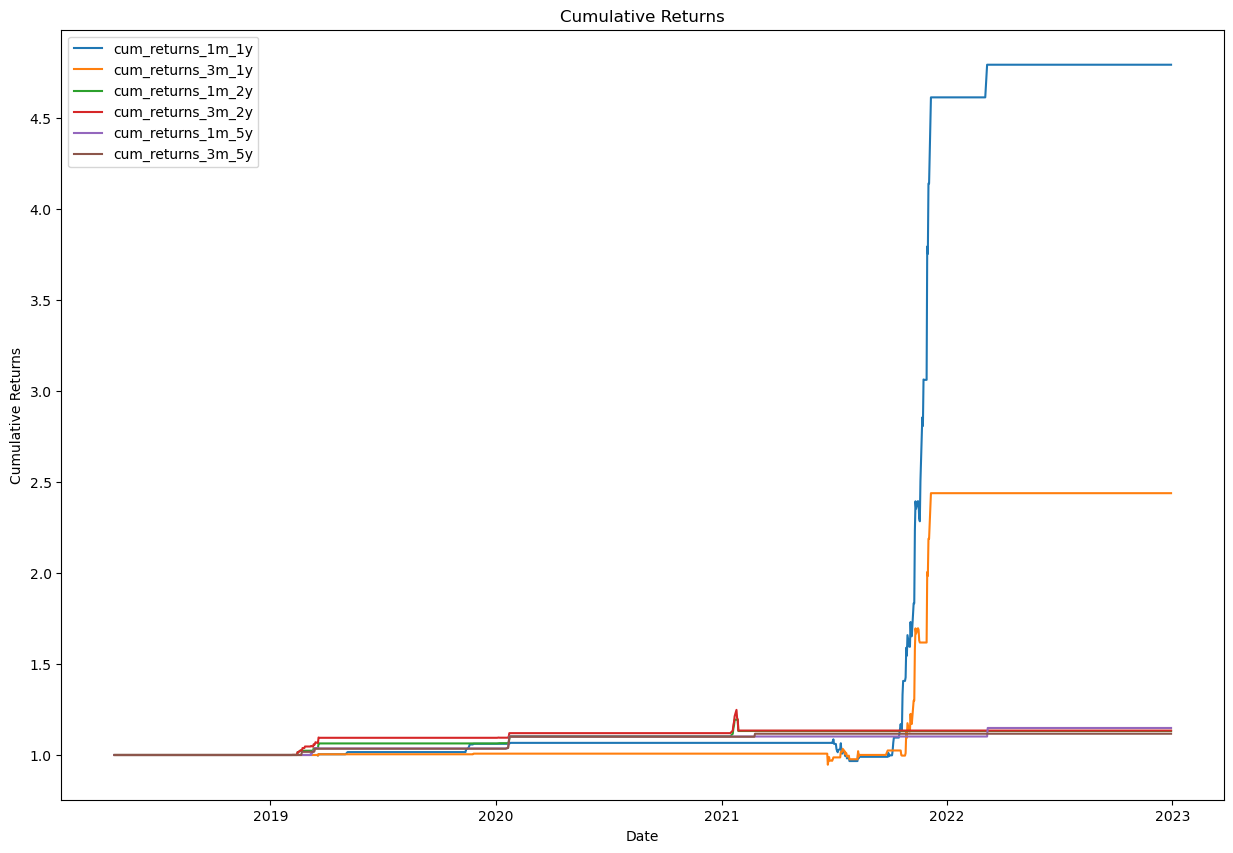

In [246]:
plt.figure(figsize=(15, 10))
plt.plot(cum_returns_1m_1y)
plt.plot(cum_returns_3m_1y)
plt.plot(cum_returns_1m_2y)
plt.plot(cum_returns_3m_2y)
plt.plot(cum_returns_1m_5y)
plt.plot(cum_returns_3m_5y)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend(['cum_returns_1m_1y','cum_returns_3m_1y','cum_returns_1m_2y','cum_returns_3m_2y','cum_returns_1m_5y','cum_returns_3m_5y'])
plt.show()

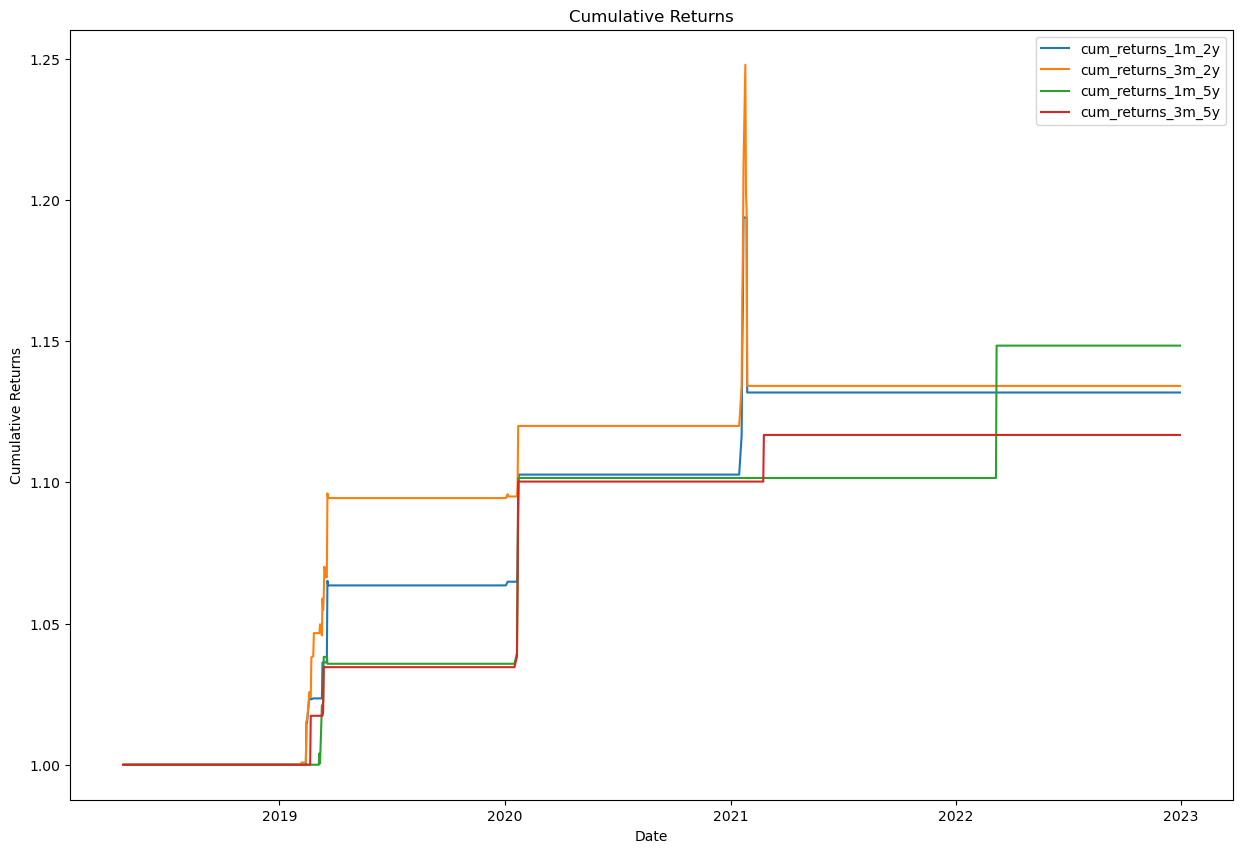

In [247]:
plt.figure(figsize=(15, 10))

plt.plot(cum_returns_1m_2y)
plt.plot(cum_returns_3m_2y)
plt.plot(cum_returns_1m_5y)
plt.plot(cum_returns_3m_5y)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')

plt.legend(['cum_returns_1m_2y','cum_returns_3m_2y','cum_returns_1m_5y','cum_returns_3m_5y'])
plt.show()